In [1]:
from dask.distributed import Client

client = Client("tcp://127.0.0.1:39983")
client

<Client: 'tcp://127.0.0.1:39983' processes=8 threads=40, memory=157.39 GiB>

In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import os.path as op
import os
import xrft
import xwavelet
from scipy.interpolate import interp2d, bisplrep, bisplev, griddata
from xgcm.grid import Grid
from xmitgcm import open_mdsdataset
from fastjmd95 import rho as densjmd95
import matplotlib.colors as clr
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
ddir = '/tank/chaocean/'
savedir = '/tank/topog/tuchida/TWA/'
tdgs = '/tank/tdgs/tuchida/TWA'

In [4]:
grav = 9.81
nensembs = 5
Kh = 20.
K4 = 1e10
Kr = 1e-5
thetaMax = 1e20
rhoConst = 9.998e2
# Cp = 3.994e3
Cp = 3989.244953
# years = np.arange(2008,2013,dtype=int)
ySstart = -15
yNstart = 15
yend = 50
dnf = 2160
nfile = 73

In [5]:
years = np.arange(1967,1968,dtype=int)
ntimes = np.arange(1421280,1576800+dnf,dnf).reshape(len(years),nfile)
dd = 0  # 
yystart = 0
ntimes[yystart,:]

array([1421280, 1423440, 1425600, 1427760, 1429920, 1432080, 1434240,
       1436400, 1438560, 1440720, 1442880, 1445040, 1447200, 1449360,
       1451520, 1453680, 1455840, 1458000, 1460160, 1462320, 1464480,
       1466640, 1468800, 1470960, 1473120, 1475280, 1477440, 1479600,
       1481760, 1483920, 1486080, 1488240, 1490400, 1492560, 1494720,
       1496880, 1499040, 1501200, 1503360, 1505520, 1507680, 1509840,
       1512000, 1514160, 1516320, 1518480, 1520640, 1522800, 1524960,
       1527120, 1529280, 1531440, 1533600, 1535760, 1537920, 1540080,
       1542240, 1544400, 1546560, 1548720, 1550880, 1553040, 1555200,
       1557360, 1559520, 1561680, 1563840, 1566000, 1568160, 1570320,
       1572480, 1574640, 1576800])

In [6]:
xs = [295,318,
      297.5,316,
      300,315
     ]
ys = [37,43,
      30.5,30,
      24,22
     ]

xo = 50e3
s = xr.DataArray(np.arange(.5,10.5,.5), dims=['scale'], 
                 coords={'scale':np.arange(.5,10.5,.5)}
                )

<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 94, 73), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 32.0 32.08 32.17 32.25 32.33 ... 41.67 41.75 41.83 41.92
  * XC       (XC) >f4 290.1 290.1 290.2 290.3 290.4 ... 299.7 299.8 299.9 300.0
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 94, 73), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 5

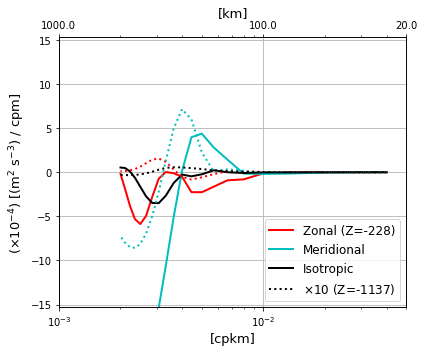

distributed.client - WARNING - Couldn't gather 1 keys, rescheduling {"('getitem-70f076ea6c02fa72578a80e6f1defcc3', 0, 0, 0)": ()}


<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 96, 109), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 38.0 38.08 38.17 38.25 38.33 ... 47.67 47.75 47.83 47.92
  * XC       (XC) >f4 313.0 313.1 313.2 313.3 313.4 ... 322.7 322.8 322.8 322.9
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 97, 108), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57

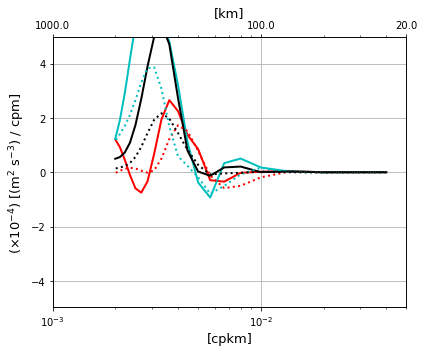

<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 72, 71), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 25.5 25.58 25.67 25.75 25.83 ... 35.17 35.25 35.33 35.42
  * XC       (XC) >f4 292.6 292.6 292.7 292.8 292.9 ... 302.2 302.3 302.4 302.4
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 72, 70), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 5

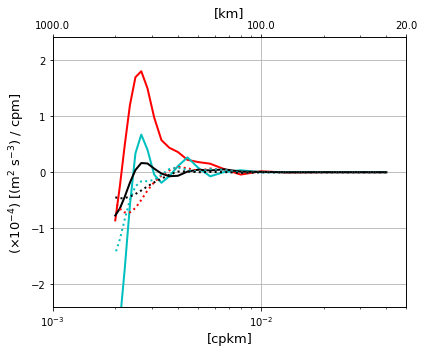

<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 78, 86), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 25.0 25.08 25.17 25.25 25.33 ... 34.67 34.75 34.83 34.92
  * XC       (XC) >f4 311.1 311.1 311.2 311.3 311.4 ... 320.7 320.8 320.9 321.0
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 78, 85), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 5

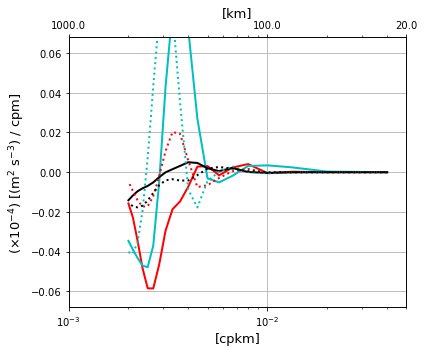

<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 68, 100), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 19.0 19.08 19.17 19.25 19.33 ... 28.67 28.75 28.83 28.92
  * XC       (XC) >f4 295.0 295.1 295.2 295.3 295.4 ... 304.7 304.8 304.9 304.9
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 69, 99), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 

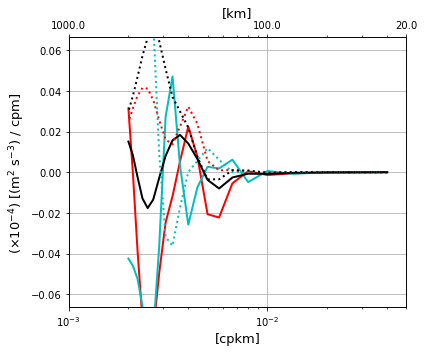

<xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 74, 74), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 58 59
  * Z        (Z) >f4 -227.6 -1.137e+03
  * YC       (YC) >f4 17.0 17.08 17.17 17.25 17.33 ... 26.67 26.75 26.83 26.92
  * XC       (XC) >f4 310.0 310.1 310.2 310.3 310.4 ... 319.7 319.7 319.8 319.9
    iter     int64 1421280
    time     timedelta64[ns] 3290 days
    rA       (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    Depth    (YC, XC) >f4 dask.array<chunksize=(120, 116), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 116), meta=np.ndarray> <xarray.DataArray (nmemb: 48, Z: 2, YC: 120, XC: 116)>
dask.array<add, shape=(48, 2, 120, 116), dtype=float32, chunksize=(1, 1, 74, 73), chunktype=numpy.ndarray>
Coordinates:
  * nmemb    (nmemb) int64 0 1 2 3 4 5 6 7 8 9 ... 50 51 52 53 54 55 56 57 5

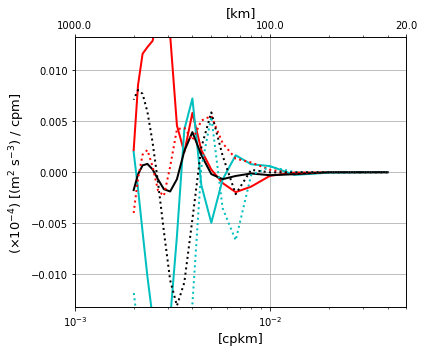

In [7]:
nmembs = np.concatenate((np.arange(24),np.arange(36,60)))
xchunk = 100
ychunk = 100

yy = yystart

for reg in range(len(xs)):
    for year in years[yystart:]:
        if year == years[yystart]:
            mtimes = ntimes[yy,:dd+1]
        else:
            mtimes = ntimes[yy]
        for itime in mtimes:

            dsb = xr.open_zarr(op.join(tdgs,'5Dave/run%4d/Ensemble-mean/%2dmembers/15N-50N_%010d.zarr'
                                       % (year,len(nmembs),itime))
                              ).isel(time=0
                                    ).sel(YC=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                          YG=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                          XC=slice(xs[reg]-5-2/12,xs[reg]+5+2/12),
                                          XG=slice(xs[reg]-5-2/12,xs[reg]+5+2/12)
                                         ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})

            for nmemb in nmembs:
                if nmemb == 0:
                    ds = open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                 % (nmemb,year)), 
                                         grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                         prefix=['diag_ocnTave'], delta_t=2e2,
                                         iters=itime, 
                                        ).sel(YC=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                              YG=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                              XC=slice(xs[reg]-5-2/12,xs[reg]+5+2/12),
                                              XG=slice(xs[reg]-5-2/12,xs[reg]+5+2/12)
                                             ).isel(time=0
                                                   ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
                else:
                    ds = xr.concat([ds, 
                                    open_mdsdataset(op.join(ddir,'qjamet/RUNS/ORAR/memb%02d/run%4d/ocn/' 
                                                            % (nmemb,year)), 
                                                    grid_dir=op.join(ddir,'grid_chaO/gridMIT_update1/'),
                                                    prefix=['diag_ocnTave'], delta_t=2e2,
                                                    iters=itime, 
                                                   ).sel(YC=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                                         YG=slice(ys[reg]-5-2/12,ys[reg]+5+2/12),
                                                         XC=slice(xs[reg]-5-2/12,xs[reg]+5+2/12),
                                                         XG=slice(xs[reg]-5-2/12,xs[reg]+5+2/12)
                                                        ).isel(time=0
                                                              ).chunk({'Z':1,'Zl':1,'Zu':1,'Zp1':1})
                                   ], dim='nmemb')

            # ds = ds.chunk({'nmemb':6})
            ds.coords['nmemb'] = ('nmemb',nmembs)

            grid = Grid(ds, periodic=[])
            
            ub = dsb.UVEL.where(ds.maskW!=0.).reset_coords(drop=True)
            vb = dsb.VVEL.where(ds.maskS!=0.).reset_coords(drop=True)
            wb = dsb.WVEL.reset_coords(drop=True)
            up = (ds.UVEL.where(ds.maskW!=0.) - ub).reset_coords(drop=True)
            vp = (ds.VVEL.where(ds.maskS!=0.) - vb).reset_coords(drop=True)
            wp = (ds.WVEL - wb).reset_coords(drop=True)
            
            up_x = grid.diff(up*ds.dyG,'X',boundary='extend') / ds.rA
            vp_x = grid.interp(grid.interp(grid.diff(vp*ds.dyC,'X',boundary='extend') / ds.rAz,
                                           'X',boundary='extend'),
                               'Y',boundary='extend')
            up_y = grid.interp(grid.interp(grid.diff(up*ds.dxC,'Y',boundary='extend') / ds.rAz,
                                           'X',boundary='extend'),
                               'Y',boundary='extend')
            vp_y = grid.diff(vp*ds.dxG,'Y',boundary='extend') / ds.rA
            
            upup_x = (grid.interp(up,'X',boundary='extend') * up_x).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            vpup_y = (grid.interp(vp,'Y',boundary='extend') * up_y).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            wpup_z = (grid.interp(wp * grid.interp(-grid.diff(up,'Z',boundary='extend'),
                                                   'X',boundary='extend') / ds.drC.data[np.newaxis,:-1,np.newaxis,np.newaxis],
                                  'Z',boundary='extend')).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            upvp_x = (grid.interp(up,'X',boundary='extend') * vp_x).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            vpvp_y = (grid.interp(vp,'Y',boundary='extend') * vp_y).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            wpvp_z = (grid.interp(wp * grid.interp(-grid.diff(vp,'Z',boundary='extend'),
                                                   'Y',boundary='extend') / ds.drC.data[np.newaxis,:-1,np.newaxis,np.newaxis],
                                  'Z',boundary='extend')).isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2))
            
            AdvU = upup_x + vpup_y + wpup_z
            AdvV = upvp_x + vpvp_y + wpvp_z
            print(AdvU, AdvV)
            

            dx = grid.interp(ds.dxC,'X',boundary='extend').isel(YC=slice(2,-2),XC=slice(2,-2)).mean(skipna=True)
            dy = grid.interp(ds.dyC,'Y',boundary='extend').isel(YC=slice(2,-2),XC=slice(2,-2)).mean(skipna=True)
            N = AdvU.shape
            ub = xr.DataArray(grid.interp(ub,'X',boundary='extend').isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2)).data, 
                              dims=AdvU.isel(nmemb=0).dims, 
                              coords={'Z':AdvU.Z,
                                      'YC':np.arange(0,N[-2]*dy,dy),
                                      'XC':np.arange(0,N[-1]*dx,dx)}
                             )
            vb = xr.DataArray(grid.interp(vb,'Y',boundary='extend').isel(Z=[14,24],YC=slice(2,-2),XC=slice(2,-2)).data, 
                              dims=AdvV.isel(nmemb=0).dims, 
                              coords={'Z':AdvV.Z,
                                      'YC':np.arange(0,N[-2]*dy,dy),
                                      'XC':np.arange(0,N[-1]*dx,dx)}
                             )
            AdvU = xr.DataArray(AdvU.data, dims=AdvU.dims, 
                                coords={'nmemb':AdvU.nmemb,'Z':AdvU.Z,
                                        'YC':np.arange(0,N[-2]*dy,dy),
                                        'XC':np.arange(0,N[-1]*dx,dx)}
                               )
            AdvV = xr.DataArray(AdvV.data, dims=AdvV.dims, 
                                coords={'nmemb':AdvV.nmemb,'Z':AdvV.Z,
                                        'YC':np.arange(0,N[-2]*dy,dy),
                                        'XC':np.arange(0,N[-1]*dx,dx)}
                               )
        
            
            ntheta = 36
            iso_csU = xwavelet.wvlt_cross_spectrum(
                    ub, AdvU, s, dim=["YC", "XC"], xo=xo, ntheta=ntheta
            )
            iso_csV = xwavelet.wvlt_cross_spectrum(
                    vb, AdvV, s, dim=["YC", "XC"], xo=xo, ntheta=ntheta
            )

            fig, ax = plt.subplots(figsize=(6,5))
            fig.set_tight_layout(True)
            ax2 = ax.twiny()
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(angle=0,Z=0).mean(['nmemb'])*1e4,
                    'r', lw=2, label=r"Zonal (Z=-228)")
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(angle=ntheta//2//2-1,Z=0).mean(['nmemb'])*1e4,
                    'c', lw=2, label=r"Meridional")
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(Z=0).mean(['nmemb','angle'])*1e4,
                    'k', lw=2, label=r"Isotropic")
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(angle=0,Z=1).mean(['nmemb'])*1e5,
                    'r:', lw=2)
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(angle=ntheta//2//2-1,Z=1).mean(['nmemb'])*1e5,
                    'c:', lw=2)
            ax.plot((iso_csU.scale)**-1*1e3, (iso_csU + iso_csV).isel(Z=1).mean(['nmemb','angle'])*1e5,
                    'k:', lw=2, label=r"$\times 10$ (Z=-1137)")
            ax.set_xscale('log')
#             ax.set_yscale('log')
            ax2.set_xscale('log')
#             ax2.set_yscale('log')
            ax.set_xlim([1e-3,5e-2])
            ax2.set_xlim([1e-3,5e-2])
            ax2.set_xticks([1e-3,1e-2,5e-2])
            ax2.set_xticklabels([1e3,1e2,2e1])
            Meta = np.fmax(np.fmax(np.abs((iso_csU + iso_csV).isel(Z=0).mean(['nmemb','angle'])).max(skipna=True).values*1e4,
                                   np.abs((iso_csU + iso_csV).isel(Z=0,angle=0).mean(['nmemb'])).max(skipna=True).values*1e4),
                           np.abs((iso_csU + iso_csV).isel(angle=ntheta//2//2-1,Z=0).mean(['nmemb'])).max(skipna=True).values*1e4
                          )
            ax.set_ylim([-Meta*.75, Meta*.75])
            ax.set_xlabel(r"[cpkm]", fontsize=13)
            ax2.set_xlabel(r"[km]", fontsize=13)
            ax.set_ylabel(r"($\times 10^{-4}$) [(m$^2$ s$^{-3}$) / cpm]", fontsize=13)
            ax.grid(True)
            if reg == 0:
                ax.legend(loc='lower right', fontsize=12)
            plt.savefig(op.join('/tank/topog/tuchida/Wavelet-spectrum/Figs/MtoE_KE-spec_Region%02d.pdf' % reg))
        plt.show()